# Los Markdown son editores de texto

Como es un editor de texto nos sirve para describir fragmetos del codigo o de la aplicacion que se desarrolla en el entorno de prueba

## Iniciamos con las sintaxis 

 - print (imprimir)

In [44]:
print("Hola, este es un mensaje que le puedes enseñar al usuario")

Hola, este es un mensaje que le puedes enseñar al usuario


# Ejemplo 1: Proyeccion de cuentas

## El modelo a emplear sera Holt - Winter con factor multiplicativo


1. Cargar y preparar los datos

Antes de aplicar cualquier modelo, es fundamental asegurar la calidad de los datos y la correcta transformación de la fecha.

In [92]:
# en la terminal colocar:
#  pip install openpyxl
# 


import pandas as pd

# Cargar el archivo Excel
df = pd.read_excel("Datos.xlsx")  

# Transformar la columna de fecha a formato datetime
df['Year'] = pd.to_datetime(df['Year'])  
df.set_index('Year', inplace=True)  


In [93]:
# veamos que los elementos esten cargados correctamentes
df.head()

,Observ- ations
Year,
2002-01-31,0.000609
2002-02-28,0.000768
2002-03-31,0.001031
2002-04-30,0.001077
2002-05-31,0.000816


In [94]:
# ahora veamos los estadisticos historicos

df.describe()
# print(df.describe())

,Observ- ations
count,2.810000e+02
mean,5.434150e+08
std,1.507431e+09
min,6.086712e-04
25%,4.113107e-03
50%,2.356325e-02
75%,3.843094e+04
max,7.930476e+09


2. Análisis exploratorio inicial

Antes de modelar, debemos visualizar los datos y verificar posibles problemas.

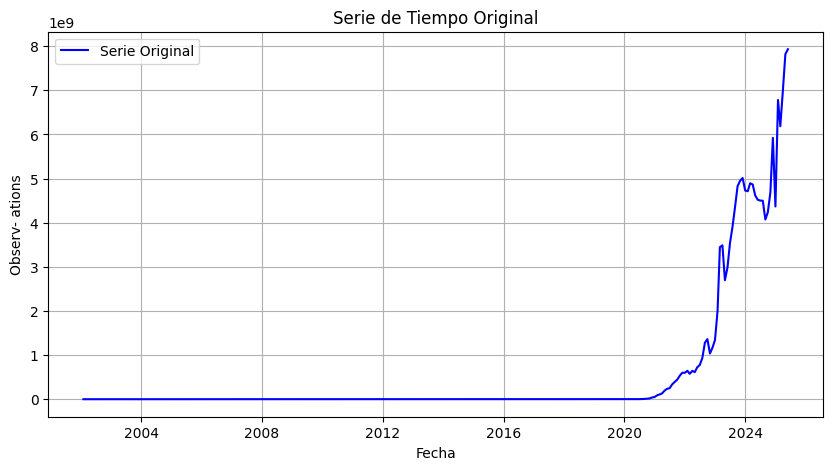

In [95]:
import matplotlib.pyplot as plt

# Graficar la serie original
plt.figure(figsize=(10,5))
plt.plot(df.index, df['Observ- ations'], label="Serie Original", color='blue')
plt.xlabel("Fecha")
plt.ylabel("Observ- ations")
plt.title("Serie de Tiempo Original")
plt.legend()
plt.grid()
plt.show()


3. Verificación de estacionariedad

La prueba de Dickey-Fuller nos ayuda a determinar si la serie es estacionaria o si requiere transformación.

In [96]:
# en la consola colocar :
# pip install statsmodels

from statsmodels.tsa.stattools import adfuller

# Aplicar prueba de Dickey-Fuller
resultado_adf = adfuller(df['Observ- ations'])
print(f"ADF Statistic: {resultado_adf[0]}")
print(f"p-value: {resultado_adf[1]}")

# Interpretación:
if resultado_adf[1] < 0.05:
    print("La serie es estacionaria.")
else:
    print("La serie NO es estacionaria.")


ADF Statistic: 5.410072123138346
p-value: 1.0
La serie NO es estacionaria.


4. Descomposición de la serie de tiempo

Para entender tendencias y estacionalidad, aplicamos una descomposición multiplicativa.

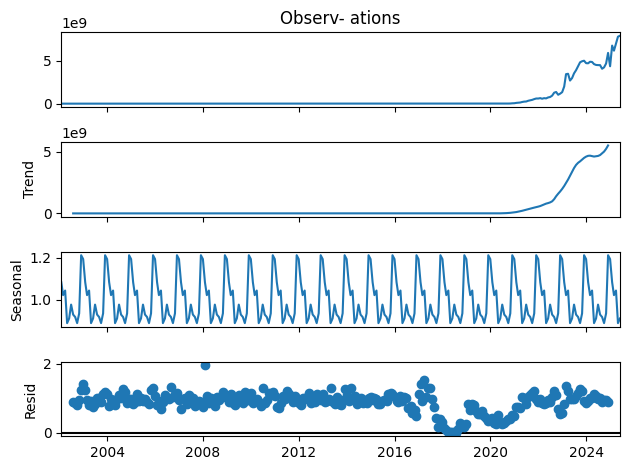

In [97]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Descomposición de la serie
descomposicion = seasonal_decompose(df['Observ- ations'], model='multiplicative', period=12)
descomposicion.plot()
plt.show()



5. Aplicar el modelo Holt-Winters

Ahora ajustamos el modelo multiplicativo, que captura tanto tendencia como estacionalidad.

In [98]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Ajustar el modelo Holt-Winters multiplicativo
modelo = ExponentialSmoothing(df['Observ- ations'], trend='multiplicative', seasonal='multiplicative', seasonal_periods=12)
ajuste = modelo.fit()

# Agregar las estimaciones al DataFrame
df['Estimación'] = ajuste.fittedvalues


/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


6. Generar proyecciones

Definimos un horizonte de días y obtenemos las predicciones.

In [99]:
# Número de días a proyectar
horizonte = 10  
predicciones = ajuste.forecast(horizonte)

# Crear DataFrame con las predicciones
df_predicciones = pd.DataFrame({
    'Fecha': pd.date_range(start=df.index[-1], periods=horizonte+1, freq='D')[1:],
    'Valor Estimado': predicciones
})


In [100]:
# Observación de las primeras cinco predicciones

df_predicciones.head()

,Fecha,Valor Estimado
2025-06-30,2025-06-01,7.642915e+09
2025-07-31,2025-06-02,7.321429e+09
2025-08-31,2025-06-03,7.338545e+09
2025-09-30,2025-06-04,8.262812e+09
2025-10-31,2025-06-05,8.781657e+09


7. Visualización final

Graficamos la serie original junto con los valores ajustados.

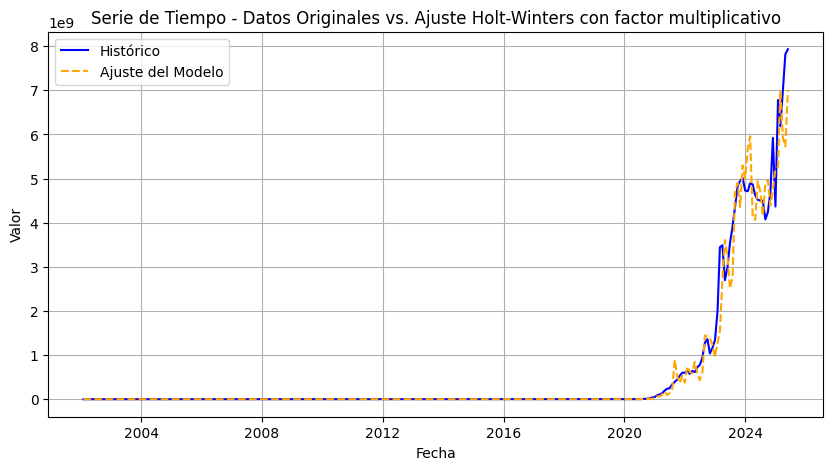

In [101]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

# Gráfico de la serie original
plt.plot(df.index, df['Observ- ations'], label="Histórico", color='blue')

# Gráfico de los valores ajustados por el modelo Holt-Winters
plt.plot(df.index, df['Estimación'], label="Ajuste del Modelo", color='orange', linestyle='dashed')

# Configuración del gráfico
plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.title("Serie de Tiempo - Datos Originales vs. Ajuste Holt-Winters con factor multiplicativo")
plt.legend()
plt.grid()
plt.show()


Ahora graficaremos los valores originales con las respectivas proyecciones a un horizonte de 10 meses

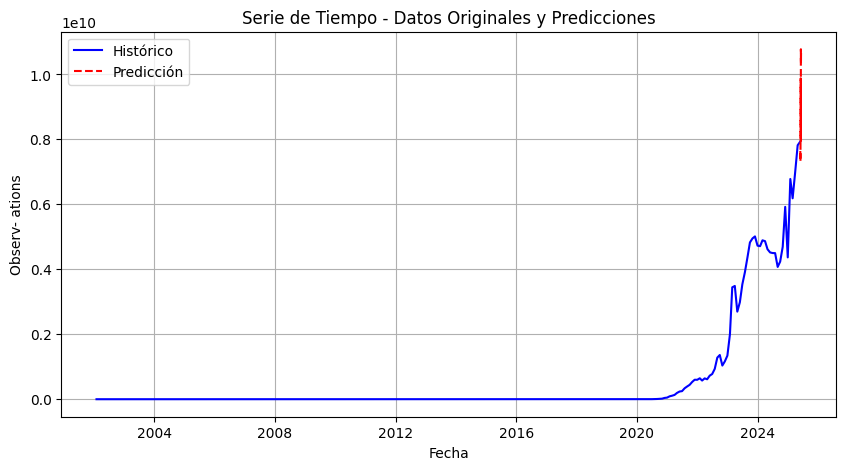

In [102]:
plt.figure(figsize=(10,5))

# Gráfico de la serie original
plt.plot(df.index, df['Observ- ations'], label="Histórico", color='blue')

# Gráfico de las proyecciones
plt.plot(df_predicciones['Fecha'], df_predicciones['Valor Estimado'], label="Predicción", color='red', linestyle='dashed')

# Configuración del gráfico
plt.xlabel("Fecha")
plt.ylabel("Observ- ations")
plt.title("Serie de Tiempo - Datos Originales y Predicciones")
plt.legend()
plt.grid()
plt.show()


8. Veamos los parametros del modelo

In [103]:
# Mostrar parámetros del modelo Holt-Winters
print("Parámetros del modelo:")
print(ajuste.params)


Parámetros del modelo:
{'smoothing_level': np.float64(0.5353571428571429), 'smoothing_trend': np.float64(0.00010000000000000002), 'smoothing_seasonal': np.float64(0.46464285714285714), 'damping_trend': nan, 'initial_level': np.float64(0.0010587458026304324), 'initial_trend': np.float64(1.0083609401729419), 'initial_seasons': array([0.99721219, 0.96388959, 0.93119403, 0.78810974, 0.87865284,
       0.94801301, 0.91366044, 0.93892227, 0.83222143, 0.9847928 ,
       1.44261678, 1.38071488]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [104]:
print("Nivel de suavización:", ajuste.params['smoothing_level'])
print("Tendencia de suavización:", ajuste.params['smoothing_trend'])
print("Estacionalidad de suavización:", ajuste.params['smoothing_seasonal'])


Nivel de suavización: 0.5353571428571429
Tendencia de suavización: 0.00010000000000000002
Estacionalidad de suavización: 0.46464285714285714


9. Exportar resultados a Excel

Guardamos los datos originales y las proyecciones en dos pestañas.

In [106]:
# escribir en la terminal:
# pip install xlsxwriter

with pd.ExcelWriter("resultado.xlsx", engine='xlsxwriter') as writer:
    df.to_excel(writer, sheet_name="Datos Originales")
    df_predicciones.to_excel(writer, sheet_name="Proyecciones")
